<h1 align="center"> Customer Personality Analysis </h1>

***

<font size="3"><strong fontsize="14">Agenda:</strong> 
The main motive of this project is to perform Data cleaning, Data Wrangling and deriving insights from the analysis using EDA which will help us in categorizing customers based on specific columns. 

---

We analyze the data based on the columns the data has and find associations with other features. 

</font>

<font size="3">Importing necessary libraries and loading the datasets</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use("seaborn-darkgrid")
print(plt.style.available)

cust_data = pd.read_csv("/Users/akshaykrishna/Documents/Datasets/marketing_campaign.csv", header=0, \
                        delimiter="\t", index_col="ID", parse_dates=["Dt_Customer"])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<font size="3">Checking the customer data and understand the columns to find any helpful columns</font>

In [3]:
cust_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<font size="3">As a part of exploring the data we need to understand the columns type too.</font>

In [4]:
cust_data.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

<font size="3">Renaming the birth year for easy interpretation and also other columns such as products columns.</font>

In [5]:
temp_cust_data = cust_data.rename(columns={"Year_Birth":"YoB", "MntWines":"Wines", "MntFruits":"Fruits",\
                                           "MntMeatProducts":"MeatProducts","MntFishProducts":"FishProducts",\
                                           "MntSweetProducts":"SweetProducts","MntGoldProds":"GoldProds"})

In [6]:
temp_cust_data.columns

Index(['YoB', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

<font size="3">Checking for NaNs and removing them from all columns.</font>

In [7]:
def checkNaNs(dataframe):
    for feat in dataframe.columns:
        sumOfNaNs = dataframe[feat].isna().sum()
        
        if sumOfNaNs > 0:
            print("For column '{0}' we have NaNs so replacing with mean".format(feat))
            dataframe[feat].fillna(dataframe[feat].mean(), inplace=True)
        else:
            continue
            
checkNaNs(temp_cust_data)

For column 'Income' we have NaNs so replacing with mean


<font size="3">List of columns which we are interested in : [Income, Marital_Status, Education, YoB, Dt_Customer, 
Amount of all products, NumStorePurchases, AcceptedCmp[1,2,4,5], Response, Complain]</font>

<font size="3">Finding unique values for all the columns to replace the the irrelevant values to the analysis.</font>

In [8]:
def uniqueValues(df):
    for feat in df.columns:
        if df[feat].dtype == object:
            print("For column '{0}', unique values -- {1}".format(feat, df[feat].unique()))
        
uniqueValues(temp_cust_data)

For column 'Education', unique values -- ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
For column 'Marital_Status', unique values -- ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [9]:
temp_cust_data["Education"].\
    replace({"2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Graduate", "Basic":"School"}, inplace=True)

In [10]:
temp_cust_data["Education"].unique()

array(['Graduate', 'PhD', 'School', 'Undergraduate'], dtype=object)

<font size="3">We have replaced most of the categories with Single because if there is no spouse then we can consider as Single. And here Single can mean many different things.</font>

In [11]:
temp_cust_data["Marital_Status"].\
    replace({"Together":"Married", "Alone":"Single", "YOLO":"Single", "Divorced":"Single", "Widow":"Single", "Absurd":"Single"}, inplace=True)

temp_cust_data["Marital_Status"].unique()

array(['Single', 'Married'], dtype=object)

In [12]:
temp_cust_data.dtypes

YoB                             int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
MeatProducts                    int64
FishProducts                    int64
SweetProducts                   int64
GoldProds                       int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [13]:
temp_cust_data["Response"].unique()

array([1, 0])

In [14]:
temp_cust_data["Income"] = temp_cust_data["Income"].astype(int)
temp_cust_data.dtypes

# Commented because it is taking up all the categories even after filtering based on Income feature
#income_labels = ["{0} - {1}".format(i, i+10000) for i in range(0, max(temp_cust_data["Income"]), 10000)]
#temp_cust_data["Income_Categories"] = pd.cut(temp_cust_data["Income"].values, range(0, max(temp_cust_data["Income"])+5000, 10000), right=True, labels=income_labels)
#temp_cust_data = temp_cust_data[temp_cust_data["Income"] <= 120000]

YoB                             int64
Education                      object
Marital_Status                 object
Income                          int64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
MeatProducts                    int64
FishProducts                    int64
SweetProducts                   int64
GoldProds                       int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


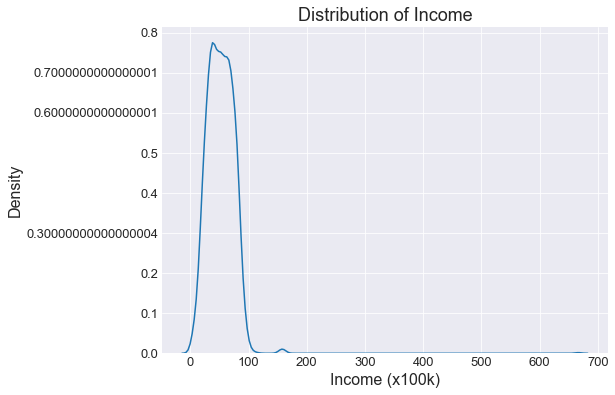

In [15]:
# Checking the distribution of Income feature and putting semicolon to hide the metadata information of a plot

plt.figure(figsize=(8,6));
g = sns.kdeplot(data=temp_cust_data, x="Income");
plt.xlabel("Income (x100k)", fontsize=16);
plt.ylabel("Density", fontsize=16);

xlabels = [int(x) for x in g.get_xticks()/1000]   # Converting the income into 100k times and plotting for easy interpretation
ylabels = np.arange(0,1,0.1)
g.set_xticklabels(labels = xlabels, fontsize=13); 
g.set_yticklabels(labels = ylabels, fontsize=13);
plt.yticks(fontsize=13);
plt.title("Distribution of Income", fontsize=18);

<font size="3">As it can be seen that most of the income lies from 0 to $130k, we can consider the rest to be outliers so that they won't affect the model and it also follows normal distribution.

From the above graph it can also be seen that 0.45%(approx) of the population have income $0 who can be youth who use their parents money</font>

In [16]:
# Drop the rows which have Income more than $130000

temp_cust_data["TotalProdsAmount"] = temp_cust_data.iloc[:,8:14].sum(axis=1)
temp_cust_data = temp_cust_data[temp_cust_data["Income"] <= 130000]

<font size="3">Categorizing income of the customers into categories with a step of $10000</font>

In [17]:
income_labels = ["{0} - {1}".format(i, i+10000) for i in range(0, max(temp_cust_data["Income"]), 10000)]
temp_cust_data["Income_Categories"] = pd.cut(temp_cust_data["Income"].values, range(0, max(temp_cust_data["Income"])+10000, 10000), right=True, labels=income_labels)

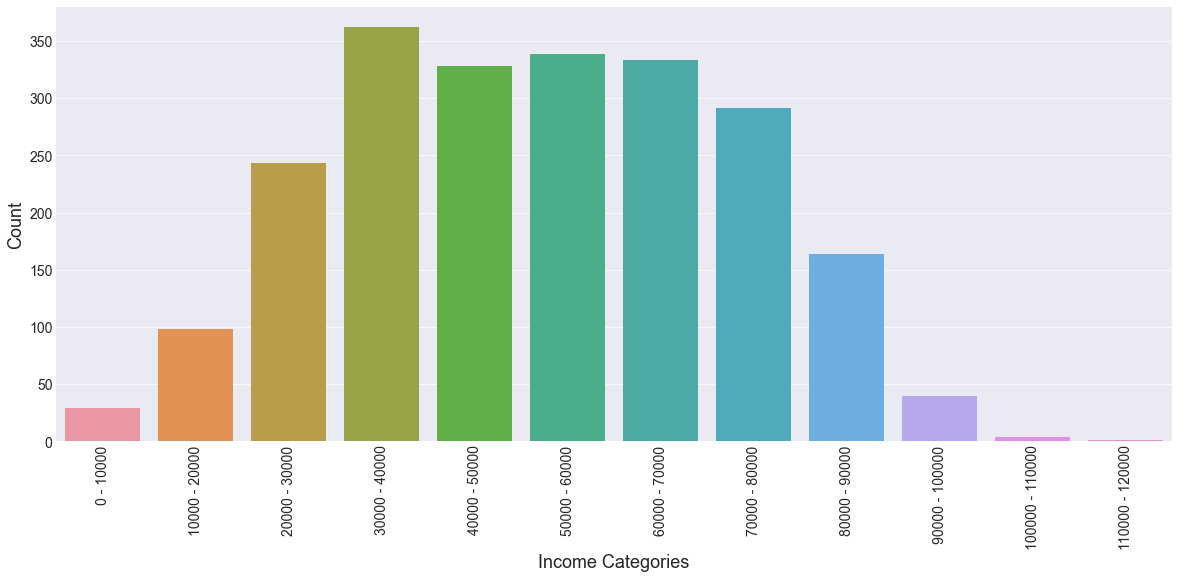

In [18]:
incomeCatLabels = ['0 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 40000', '40000 - 50000', '50000 - 60000', '60000 - 70000', '70000 - 80000', '80000 - 90000', '90000 - 100000', '100000 - 110000', '110000 - 120000']

plt.figure(figsize=(20,8))
g = sns.countplot(x="Income_Categories", data=temp_cust_data);
g.set_xticklabels(labels=incomeCatLabels, rotation=90);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel("Income Categories", fontsize=18);
plt.ylabel("Count", fontsize=18);

<font size="3">As it can be seen from the above graph there people who have income categories less than $10000 who can be students or part-time employees since they can't earn more than that.</font>

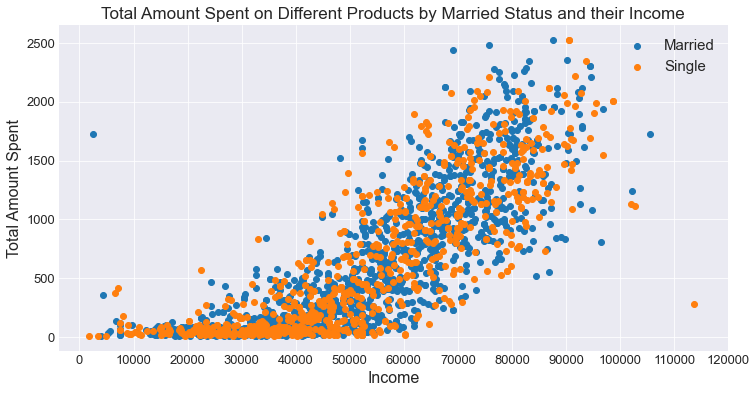

In [19]:
plt.figure(figsize=(12,6))
#g = sns.pointplot(data=temp_cust_data, x="TotalProdsAmount", y="Income", hue="Marital_Status")
#g.set(xticks=list(np.arange(0,130000,10000)))
#plt.show(g)

marriedIncomeValues = pd.Series(temp_cust_data["Income"].loc[temp_cust_data["Marital_Status"] == "Married"])
singleIncomeValues = pd.Series(temp_cust_data["Income"].loc[temp_cust_data["Marital_Status"] == "Single"])

marriedTotalValues = pd.Series(temp_cust_data["TotalProdsAmount"].loc[temp_cust_data["Marital_Status"] == "Married"])
singleTotalValues = pd.Series(temp_cust_data["TotalProdsAmount"].loc[temp_cust_data["Marital_Status"] == "Single"])

plt.scatter(x=marriedIncomeValues, y=marriedTotalValues, label="Married");
plt.scatter(x=singleIncomeValues, y=singleTotalValues, label="Single");
plt.legend(fontsize=15);
plt.xlabel("Income", fontsize=16);
plt.ylabel("Total Amount Spent", fontsize=16);
plt.title("Total Amount Spent on Different Products by Married Status and their Income", fontsize=17);
plt.xticks(range(0,130000,10000), fontsize=13);
plt.yticks(fontsize=13);

<font size="3">As it can be seen that most of the amount spent on products is concentrated in the income range of 30k - 90k where Singles have stopped spending more than Married which can lead us to an assumption that singles do not purchase any products for themselves but also share with their flatmates or roommates which makes the amount spent less.</font>

In [20]:
# Since we don't need the individual products columns we remove them from the dataframe.

#temp_cust_data.drop(columns=["Wines","Fruits","MeatProducts","FishProducts","SweetProducts","GoldProds"], axis=1, inplace=True)

In [21]:
temp_cust_data.columns

Index(['YoB', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'TotalProdsAmount', 'Income_Categories'],
      dtype='object')

<font size="3">Number of web purchases and store purchases for the past 3 years monthly</font>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


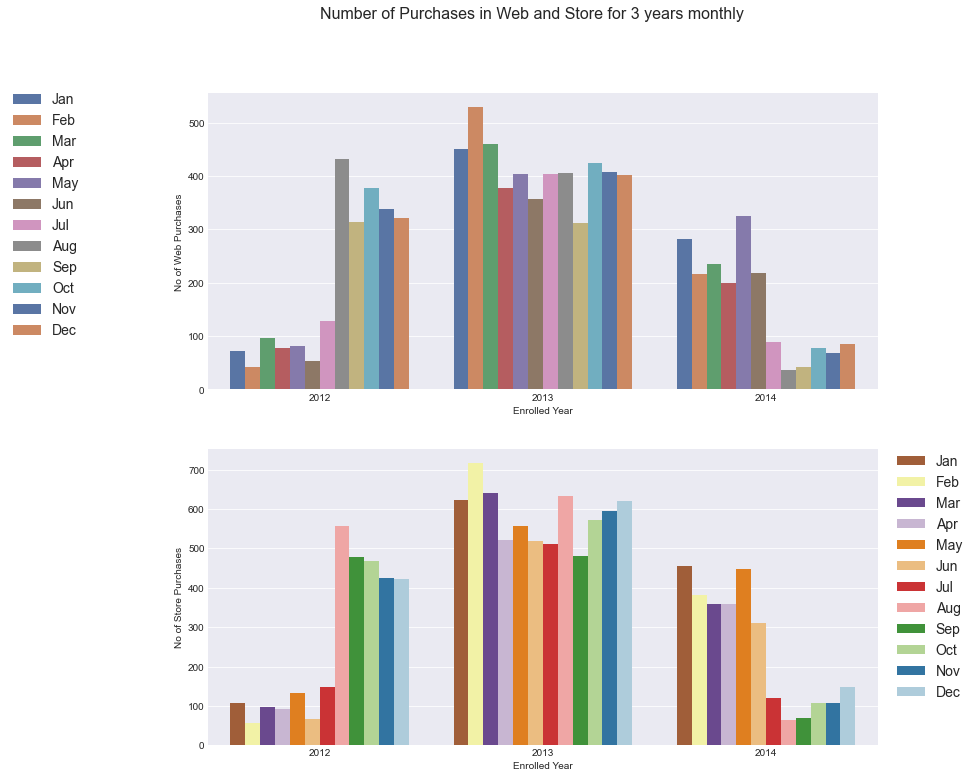

In [22]:
temp_cust_data["enrollYear"] = pd.DatetimeIndex(temp_cust_data["Dt_Customer"]).year
temp_cust_data["enrollMonth"] = pd.DatetimeIndex(temp_cust_data["Dt_Customer"]).month

purchase_df = temp_cust_data.groupby(["enrollYear", "enrollMonth"])["NumWebPurchases", "NumStorePurchases"].sum().reset_index()

month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig, axes = plt.subplots(2,1, figsize=(12,12));
plt.suptitle("Number of Purchases in Web and Store for 3 years monthly", fontsize=16);

sns.barplot(ax=axes[0], x="enrollYear", y="NumWebPurchases", hue="enrollMonth", data=purchase_df, ci=None, palette="deep");
axes[0].legend(labels=month_labels, bbox_to_anchor=(-0.3, 1.02), loc='upper left', borderaxespad=0, fontsize=14);

sns.barplot(ax=axes[1], x="enrollYear", y="NumStorePurchases", hue="enrollMonth", data=purchase_df, ci=None, palette="Paired_r");
axes[1].legend(labels=month_labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14);

plt.setp(axes[0:2], xlabel = "Enrolled Year");
plt.setp(axes[0], ylabel = "No of Web Purchases");
plt.setp(axes[1], ylabel = "No of Store Purchases");

In [23]:
purchase_df.sort_values(by=["enrollYear","enrollMonth"])

,enrollYear,enrollMonth,NumWebPurchases,NumStorePurchases
0,2012,1,72,107
1,2012,2,42,57
2,2012,3,97,97
3,2012,4,78,91
4,2012,5,82,133
5,2012,6,53,67
6,2012,7,128,147
7,2012,8,431,556
8,2012,9,313,478
9,2012,10,377,469


In [24]:
temp_cust_data["TotalProductsAmount"] = temp_cust_data.iloc[:,8:14].sum(axis=1)
temp_cust_data.head()

,YoB,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalProdsAmount,Income_Categories,enrollYear,enrollMonth,TotalProductsAmount
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduate,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,50000 - 60000,2012,4,1617
2174,1954,Graduate,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,40000 - 50000,2014,8,27
4141,1965,Graduate,Married,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,70000 - 80000,2013,8,776
6182,1984,Graduate,Married,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,20000 - 30000,2014,10,53
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,50000 - 60000,2014,1,422


In [25]:
# Adding age column to create categories using cut() function from pandas package

for i in range(len(temp_cust_data["YoB"])):
    temp_cust_data["Age"] = datetime.date.today().year - temp_cust_data["YoB"]
    
age_labels = ["{0} - {1}".format(i, i+9) for i in range(0, max(temp_cust_data["Age"]), 10)]
temp_cust_data["Age_Categories"] = pd.cut(temp_cust_data["Age"].values, range(0, max(temp_cust_data["Age"])+5,10), right=True, labels=age_labels)

temp_cust_data.head()

,YoB,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalProdsAmount,Income_Categories,enrollYear,enrollMonth,TotalProductsAmount,Age,Age_Categories
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduate,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,50000 - 60000,2012,4,1617,64,60 - 69
2174,1954,Graduate,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,40000 - 50000,2014,8,27,67,60 - 69
4141,1965,Graduate,Married,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,70000 - 80000,2013,8,776,56,50 - 59
6182,1984,Graduate,Married,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,20000 - 30000,2014,10,53,37,30 - 39
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,50000 - 60000,2014,1,422,40,30 - 39


<font size="3">Categorizing people based on their age.</font>

In [26]:
# Creating age groups so that we can cluster based on the age

def age_group_creation(df, column):
    for i in df[column].values:
        if int(i) > 0 and int(i) <= 13:
            df.loc[df[column] == i, ["Age_Group"]] = "Children"
        elif int(i) >= 14 and int(i) <= 19:
            df.loc[df[column] == i, ["Age_Group"]] = "Teens"
        elif int(i) >= 20 and int(i) <= 35:
            df.loc[df[column] == i, ["Age_Group"]] = "Youth"
        elif int(i) >= 36 and int(i) <= 64:
            df.loc[df[column] == i, ["Age_Group"]] = "Adults"
        else:
            df.loc[df[column] == i, ["Age_Group"]] = "Seniors"
            
age_group_creation(temp_cust_data, "Age")
temp_cust_data.head(10)

,YoB,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalProdsAmount,Income_Categories,enrollYear,enrollMonth,TotalProductsAmount,Age,Age_Categories,Age_Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduate,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,50000 - 60000,2012,4,1617,64,60 - 69,Adults
2174,1954,Graduate,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,40000 - 50000,2014,8,27,67,60 - 69,Seniors
4141,1965,Graduate,Married,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,70000 - 80000,2013,8,776,56,50 - 59,Adults
6182,1984,Graduate,Married,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,20000 - 30000,2014,10,53,37,30 - 39,Adults
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,50000 - 60000,2014,1,422,40,30 - 39,Adults
7446,1967,Graduate,Married,62513,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,716,60000 - 70000,2013,9,716,54,50 - 59,Adults
965,1971,Graduate,Single,55635,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,590,50000 - 60000,2012,11,590,50,40 - 49,Adults
6177,1985,PhD,Married,33454,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,169,30000 - 40000,2013,8,169,36,30 - 39,Adults
4855,1974,PhD,Married,30351,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,30000 - 40000,2013,6,46,47,40 - 49,Adults


<font size="3">Replace NA values with their mean</font>

In [27]:
temp_cust_data["Age"].fillna(value=int(temp_cust_data["Age"].mean()), inplace=True)
temp_cust_data["Income"].fillna(value=int(temp_cust_data["Income"].mean()), inplace=True)

<font size="3">Checking the amount spent on products based on the age categories</font>

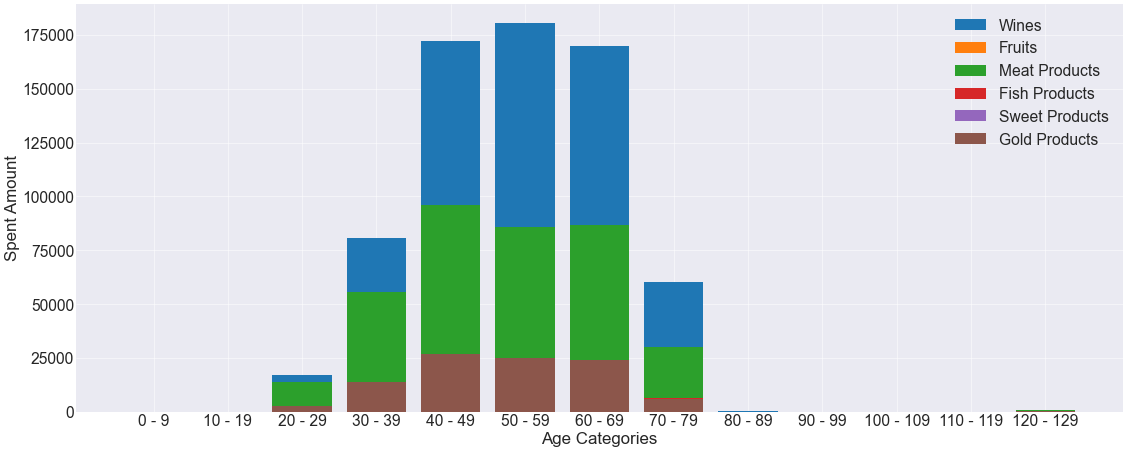

In [28]:
# Calculating sum of amount for each F&B category based on the age categories. 
# Since we are taking only the money columns there won't be any need for feature scaling

fnb_sum_df = temp_cust_data.groupby(["Age_Categories"]).agg({"Wines":"sum", "Fruits":"sum", "MeatProducts":"sum",\
                                                             "FishProducts":"sum","SweetProducts":"sum","GoldProds":"sum"}).reset_index()
AgeCat_Length = np.arange(len(fnb_sum_df["Age_Categories"]))

plt.figure(figsize=(30,12), dpi=45)


plt.bar(x=AgeCat_Length, height=fnb_sum_df.Wines,label="Wines")
plt.bar(x=AgeCat_Length, height=fnb_sum_df.Fruits,label="Fruits")
plt.bar(x=AgeCat_Length, height=fnb_sum_df.MeatProducts,label="Meat Products")
plt.bar(x=AgeCat_Length, height=fnb_sum_df.FishProducts,label="Fish Products")
plt.bar(x=AgeCat_Length, height=fnb_sum_df.SweetProducts,label="Sweet Products")
plt.bar(x=AgeCat_Length, height=fnb_sum_df.GoldProds,label="Gold Products")

plt.xticks(AgeCat_Length, fnb_sum_df.Age_Categories)
plt.xlabel("Age Categories", fontsize=27)
plt.ylabel("Spent Amount", fontsize=27)
plt.tick_params(labelsize=25)
plt.legend(fontsize=25)

In [29]:
temp_cust_data["Dt_Customer"] = pd.to_datetime(temp_cust_data["Dt_Customer"], exact=True)
temp_cust_data.dtypes

temp_cust_data = temp_cust_data.replace({"Age_Group" : {1:"Youth", 2:"Adults", 3:"Seniors"}})

<font size="3">Plotting the age groups and we find most of the people are adults and very few are seniors and youth</font>

Text(-1.5750000000000028, 0.5, 'Count')

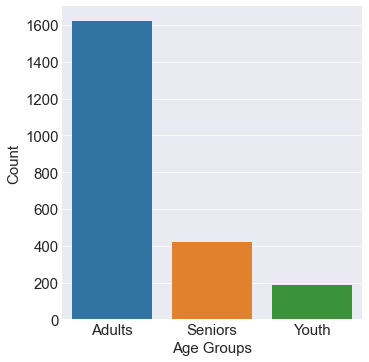

In [30]:
# Plot the number of people in different age groups

sns.catplot(x="Age_Group", kind="count", data=temp_cust_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Age Groups", fontsize=15)
plt.ylabel("Count", fontsize=15)

In [31]:
temp_cust_data["NumDealsPurchases"].head(10)

ID
5524    3
2174    2
4141    1
6182    2
5324    5
7446    2
965     4
6177    2
4855    1
5899    1
Name: NumDealsPurchases, dtype: int64

<font size="3"><b>List all campaigns and check how customers reacted in each campaign.<b></font>

In [32]:
temp_cust_data.columns

Index(['YoB', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'TotalProdsAmount', 'Income_Categories',
       'enrollYear', 'enrollMonth', 'TotalProductsAmount', 'Age',
       'Age_Categories', 'Age_Group'],
      dtype='object')

In [33]:
# Clustering the customers based on how they react with the campaigns launched

# Renaming lastly accepted campaign to relevant feature name
temp_cust_data = temp_cust_data.rename(columns={"Response":"AcceptedCmp6"})

# Checking if any of the campaign has NA/null values

for feat in temp_cust_data.columns:
    if feat.startswith("Accepted"):
        print("'{}' has null values -- {}".format(feat,temp_cust_data[feat].isna().sum()))
        
print("\n\n")
# Checking the unique values of every campaign 

for feat in temp_cust_data.columns:
    if feat.startswith("Accepted"):
        print("'{}' has unique values -- {}".format(feat,temp_cust_data[feat].unique()))

'AcceptedCmp3' has null values -- 0
'AcceptedCmp4' has null values -- 0
'AcceptedCmp5' has null values -- 0
'AcceptedCmp1' has null values -- 0
'AcceptedCmp2' has null values -- 0
'AcceptedCmp6' has null values -- 0



'AcceptedCmp3' has unique values -- [0 1]
'AcceptedCmp4' has unique values -- [0 1]
'AcceptedCmp5' has unique values -- [0 1]
'AcceptedCmp1' has unique values -- [0 1]
'AcceptedCmp2' has unique values -- [0 1]
'AcceptedCmp6' has unique values -- [1 0]


<font size="3">Understanding the total amount spend and classifying based on Campaign acceptance and we can find a trend for each Campaign</font>

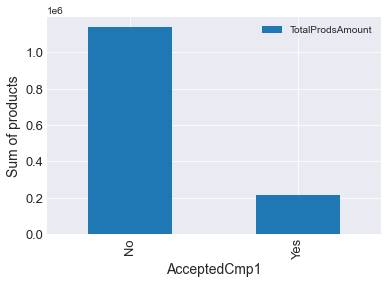

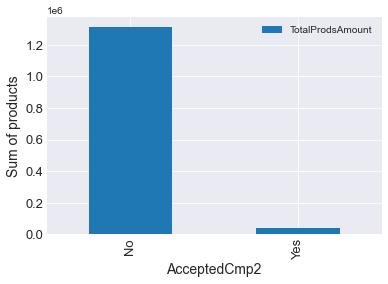

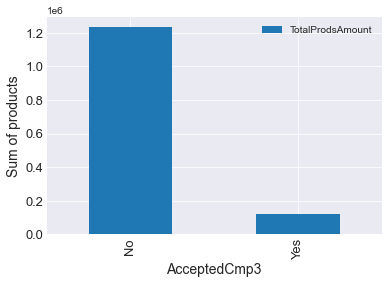

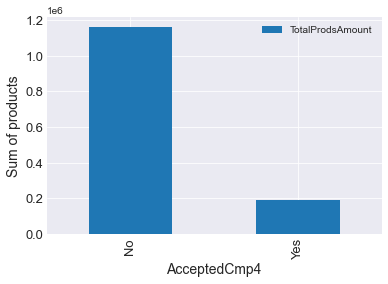

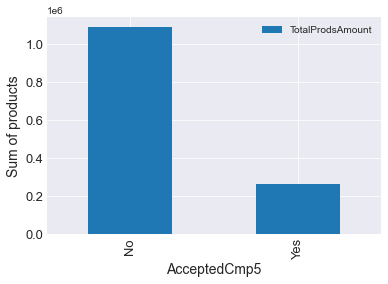

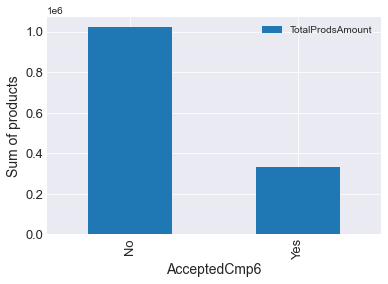

In [34]:
allCamps = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp6"]

# Before checking the number of values we replace the values in the campaign
for feat in allCamps:
    temp_cust_data[feat].replace({0:"No", 1:"Yes"}, inplace=True)

initialCampaigns = ["AcceptedCmp1", "AcceptedCmp2"]

for camp in allCamps:
    temp_cust_data.groupby(camp).agg({"TotalProdsAmount":"sum"}).plot(kind="bar")
    plt.xlabel(camp,fontsize=14)
    plt.ylabel("Sum of products", fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

<font size="3"><b>We use wide_to_long to transform the columns to row values based on the column end value<b></font>

In [35]:
# Create a dataframe which has all the campaign accepting participants and then label them based on the campaign number.

campedData = pd.wide_to_long(temp_cust_data.reset_index(), stubnames="AcceptedCmp", i="ID", j="Camp").reset_index()
campedData = (campedData[campedData["AcceptedCmp"] == "Yes"]).set_index("ID").sort_values(by=["Camp"])

campedData.head()

,Camp,GoldProds,Complain,NumWebPurchases,NumStorePurchases,TotalProdsAmount,MeatProducts,Fruits,Kidhome,Dt_Customer,Marital_Status,NumWebVisitsMonth,enrollYear,YoB,FishProducts,Education,Age,Z_CostContact,enrollMonth,Teenhome,Z_Revenue,Income_Categories,Wines,NumDealsPurchases,Recency,TotalProductsAmount,SweetProducts,NumCatalogPurchases,Age_Group,Age_Categories,Income,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7215,1,168,0,6,13,1135,102,27,0,2013-12-03,Single,2,2013,1983,44,Graduate,38,3,12,0,11,100000 - 110000,722,0,69,1135,72,8,Adults,30 - 39,101970,Yes
8492,1,0,0,8,10,1493,545,0,0,2013-09-11,Married,6,2013,1978,95,Graduate,43,3,9,0,11,70000 - 80000,795,1,25,1493,58,4,Adults,40 - 49,75437,Yes
8545,1,51,0,2,10,1789,311,17,0,2014-03-21,Single,1,2014,1954,45,Graduate,67,3,3,0,11,80000 - 90000,1296,1,6,1789,69,4,Seniors,60 - 69,85683,Yes
4580,1,182,0,9,9,2486,708,22,0,2013-10-25,Married,5,2013,1969,89,Graduate,52,3,10,0,11,70000 - 80000,1394,1,46,2486,91,7,Adults,50 - 59,75759,Yes
5718,1,231,0,5,6,1415,108,168,0,2013-08-15,Married,3,2013,1950,192,Graduate,71,3,8,0,11,80000 - 90000,674,1,17,1415,42,11,Seniors,70 - 79,80763,Yes


In [36]:
print(campedData["Camp"].unique())
print(campedData["Camp"].dtype)

[1 2 3 4 5 6]
int64


In [37]:
for i in range(len(campedData["YoB"])):
    campedData["Age"] = datetime.date.today().year - campedData["YoB"]

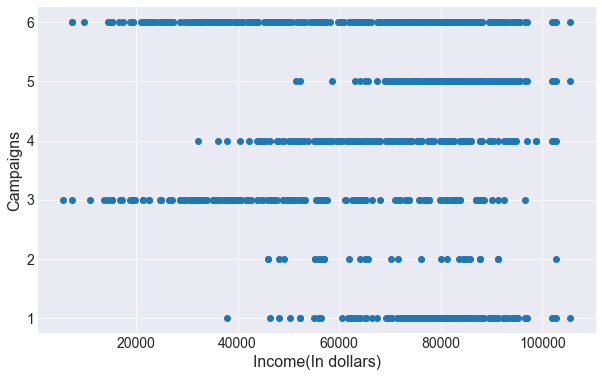

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(campedData["Income"], campedData["Camp"])
plt.ylabel("Campaigns", fontsize=16);
plt.xlabel("Income(In dollars)", fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [39]:
temp_cust_data.head(10)

,YoB,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,TotalProdsAmount,Income_Categories,enrollYear,enrollMonth,TotalProductsAmount,Age,Age_Categories,Age_Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduate,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,No,No,No,No,No,0,3,11,Yes,1617,50000 - 60000,2012,4,1617,64,60 - 69,Adults
2174,1954,Graduate,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,No,No,No,No,No,0,3,11,No,27,40000 - 50000,2014,8,27,67,60 - 69,Seniors
4141,1965,Graduate,Married,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,No,No,No,No,No,0,3,11,No,776,70000 - 80000,2013,8,776,56,50 - 59,Adults
6182,1984,Graduate,Married,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,No,No,No,No,No,0,3,11,No,53,20000 - 30000,2014,10,53,37,30 - 39,Adults
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,No,No,No,No,No,0,3,11,No,422,50000 - 60000,2014,1,422,40,30 - 39,Adults
7446,1967,Graduate,Married,62513,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,No,No,No,No,No,0,3,11,No,716,60000 - 70000,2013,9,716,54,50 - 59,Adults
965,1971,Graduate,Single,55635,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,No,No,No,No,No,0,3,11,No,590,50000 - 60000,2012,11,590,50,40 - 49,Adults
6177,1985,PhD,Married,33454,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,No,No,No,No,No,0,3,11,No,169,30000 - 40000,2013,8,169,36,30 - 39,Adults
4855,1974,PhD,Married,30351,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,No,No,No,No,No,0,3,11,Yes,46,30000 - 40000,2013,6,46,47,40 - 49,Adults


<font size="3">Creating a new column and calculating the seniority in months. Seniority is defined as the number of months the customer has association with the supermarket.

Based on the above data we define our initial hypothesis which is the <strong>null hypothesis as people can be categorized into 6 categories.</strong>
</font>

In [40]:
recent_date = pd.to_datetime(pd.datetime.now().strftime("%Y-%m-%d"))

campedData["Seniority"] = pd.to_numeric((temp_cust_data["Dt_Customer"].apply(lambda x : recent_date - x)).dt.days/30)
campedData["Seniority"].fillna(value=int(campedData["Seniority"].mean()), inplace=True)

campedData.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Camp,GoldProds,Complain,NumWebPurchases,NumStorePurchases,TotalProdsAmount,MeatProducts,Fruits,Kidhome,Dt_Customer,Marital_Status,NumWebVisitsMonth,enrollYear,YoB,FishProducts,Education,Age,Z_CostContact,enrollMonth,Teenhome,Z_Revenue,Income_Categories,Wines,NumDealsPurchases,Recency,TotalProductsAmount,SweetProducts,NumCatalogPurchases,Age_Group,Age_Categories,Income,AcceptedCmp,Seniority
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7215,1,168,0,6,13,1135,102,27,0,2013-12-03,Single,2,2013,1983,44,Graduate,38,3,12,0,11,100000 - 110000,722,0,69,1135,72,8,Adults,30 - 39,101970,Yes,97.766667
8492,1,0,0,8,10,1493,545,0,0,2013-09-11,Married,6,2013,1978,95,Graduate,43,3,9,0,11,70000 - 80000,795,1,25,1493,58,4,Adults,40 - 49,75437,Yes,100.533333
8545,1,51,0,2,10,1789,311,17,0,2014-03-21,Single,1,2014,1954,45,Graduate,67,3,3,0,11,80000 - 90000,1296,1,6,1789,69,4,Seniors,60 - 69,85683,Yes,94.166667
4580,1,182,0,9,9,2486,708,22,0,2013-10-25,Married,5,2013,1969,89,Graduate,52,3,10,0,11,70000 - 80000,1394,1,46,2486,91,7,Adults,50 - 59,75759,Yes,99.066667
5718,1,231,0,5,6,1415,108,168,0,2013-08-15,Married,3,2013,1950,192,Graduate,71,3,8,0,11,80000 - 90000,674,1,17,1415,42,11,Seniors,70 - 79,80763,Yes,101.433333


(0.0, 120000.0)

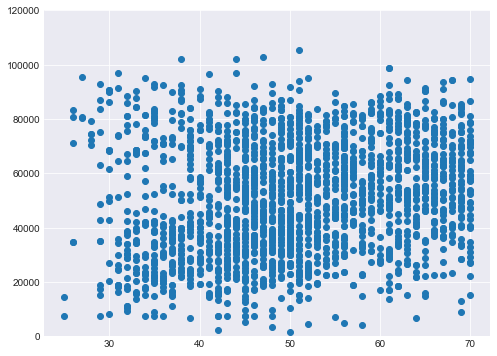

In [41]:
plt.figure(figsize=(8,6))
temp_df = temp_cust_data.loc[temp_cust_data['Age'] <= 70, ['Age', 'Income']]
plt.scatter(temp_df['Age'], temp_df['Income'])
plt.ylim([0,120000])

<font size="3">It seems like the above plot isn't suitable for clustering since the points are not distinct or distanced from each other to form a cluster if we take Age and Income features.</font>

<font size="3">Since we notice that clustering seems to be difficult if we use Age and Income but instead we can use Seniority which is the number of months the customer is in relationship with the supermarket since there are little gaps in the plotting unlike the before graph.</font>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: 

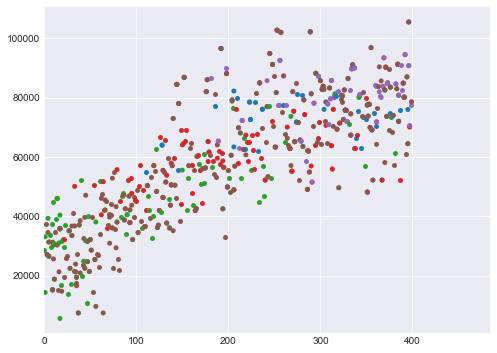

In [48]:
plt.figure(figsize=(8,6));
sns.swarmplot(campedData['TotalProdsAmount'], campedData['Income'], hue=campedData["Camp"]);
plt.ylim([0,120000]);

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(campedData['Seniority'], campedData['Income'], hue=campedData["Camp"])
plt.ylim([0,120000])

In [224]:
"""from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_temp = campedData[["Income", "Seniority"]]
X_scaled = scaler.fit_transform(dataset_temp)

scaled_df = pd.DataFrame(X_scaled, columns=["Income", "Seniority"])"""

In [231]:
#scaled_df["Camp"] = campedData["Camp"].values
scaled_df["Income"] = campedData["Income"].values
scaled_df["Seniority"] = campedData["Seniority"].values

#scaled_df = campedData.loc[:, ["Age", "Income", "Seniority"]]

<font size="3">We calculate WCSS (Within Cluster Sum of Squares) and compare it with the K value to find the actual number of clusters. WCSS means the difference between the observation and the centroid of the cluster.</font>

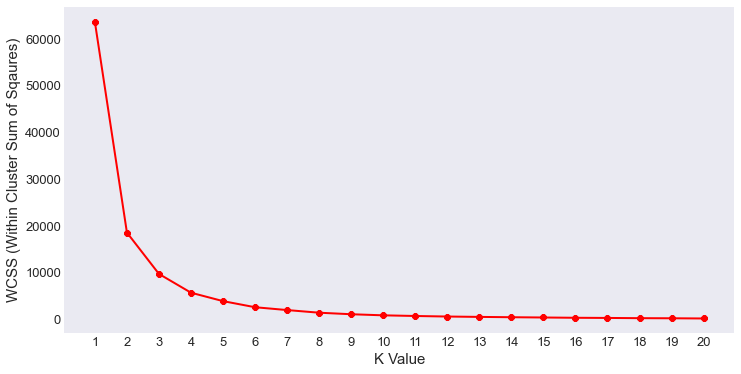

In [235]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,21):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(scaled_df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value", fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(np.arange(1,21,1), fontsize=13)
plt.ylabel("WCSS (Within Cluster Sum of Sqaures)", fontsize=15)
plt.show()

<font size="3">The final centroids are the centroids calculated for the number of clusters we gave in the elbow method and that's the reason we get 20 centroids but we use only the first 2 since we get the bent over at 2. Using the centroids algorithms clusters the points using the euclidean distance.</font>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


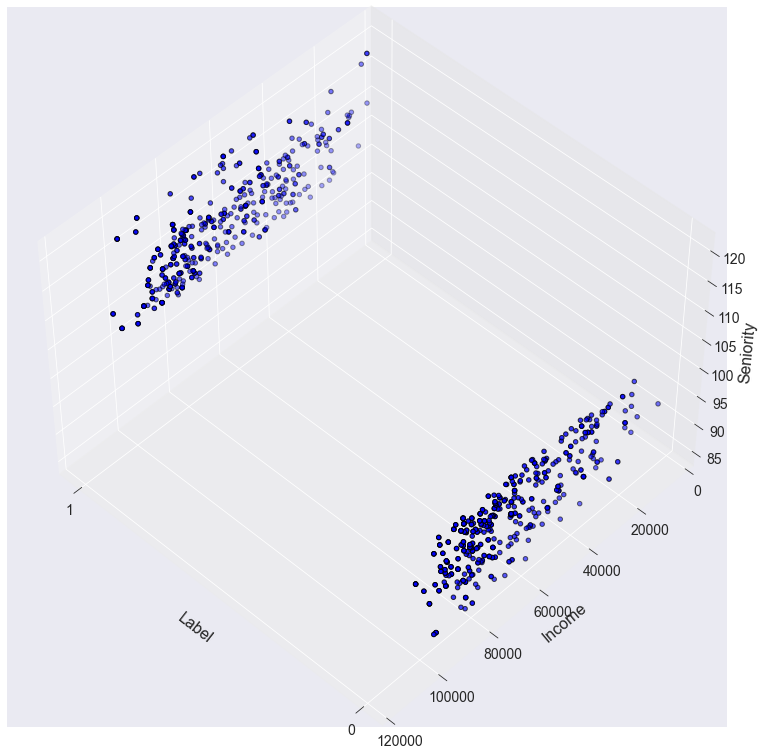

In [236]:
km = KMeans(algorithm='auto', n_clusters=2, init="k-means++")
clusters = km.fit_predict(scaled_df.iloc[:,1:])
scaled_df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter((scaled_df.label).astype(str), scaled_df.Income,  scaled_df.Seniority, c = ["blue"], edgecolor="k")

plt.ylim(0,120000)
plt.xlabel("Label", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Income", fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel('Seniority', fontsize=16)
ax.zaxis.set_tick_params(labelsize=14)
plt.show()

<font size="3"><strong> Inference:</strong> As it can be seen the algorithm clustered the data based on the columns into 2 categories from the elbow method. If we use 3 clusters the model seems working perfect but there are few points which are close to either of the present clusters due to which they cannot be classified correctly.</font>

<font size="3"><strong>Improvements:</strong> We can improve the model by finding relation between multiple columns and deriving multiple use cases like above. It helps in bringing out more insights using which we can make business decisions. We also need to test the model accuracy which will help in parameter tuning.</font>